# Проектная работа

**Задача** - Разобраться в причинах неокупаемости маркетинговой стратегии компании Procrastinate Pro+. 
**Исходные данные** - данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года - лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы. 


**Этапы** 
1. Импорт библиотек
2. Загрузка и подготовка данных
3. Задание функций для работы
4. Исследовательский анализ данных
5. Маркетинговый анализ
6. Оценка окупаемости 
7. Выводы
8. Рекомендации

## Шаг 0. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

## Загрузка и подготовка данных
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [2]:
visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs = pd.read_csv('costs_info_short.csv')

### Датафрейм visits

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
visits.sample(5)

,User Id,Region,Device,Channel,Session Start,Session End
289395,888826511081,UK,PC,WahooNetBanner,2019-09-29 17:26:56,2019-09-29 17:42:45
234190,17646028937,France,PC,organic,2019-06-25 07:12:51,2019-06-25 07:15:03
268033,637672118251,France,PC,organic,2019-08-25 18:20:40,2019-08-25 18:24:29
80481,724120770589,United States,PC,TipTop,2019-07-20 03:46:59,2019-07-20 04:19:39
83876,952620100899,United States,Mac,FaceBoom,2019-07-23 20:32:26,2019-07-23 20:54:18


In [5]:
visits.duplicated().sum()

0

Таблица **visits** содержит следующие столбцы:
1. **User Id** - уникальный идентификатор пользователя, формат int64
2. **Region** - страна пользователя, формат object
3. **Device** - тип устройства пользователя, формат object
4. **Session Start** - дата и время начала сессии, формат object
5. **Session End** - дата и время окончания сессии, формат object

Названия колонок необходимо привести к формату snake_case для более удобной работы, также столбцы **Session Start** и **Session End** необходимо привести к формату даты. Дубликаты и пропуски отсутствуют. 

In [6]:
#приведение названий столбцов к формату snake_case
visits.columns= visits.columns.str.replace(' ', '_').str.lower()

In [7]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [8]:
# приводим данные к формату datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


### Датафрейм orders

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [10]:
orders.duplicated().sum()

0

Таблица **orders** содержит следующие столбцы:
1. **User Id** - уникальный идентификатор пользователя, формат int64
2. **Event Dt** -дата и время покупки, формат object
3. **Revenue** - сумма заказа, формат float64

Названия колонок необходимо привести к формату snake_case для более удобной работы, также столбец **Revenue** необходимо привести к формату даты. Дубликаты и пропуски отсутствуют. 

In [11]:
#приведение названий столбцов к формату snake_case
orders.columns= orders.columns.str.replace(' ', '_').str.lower()
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [12]:
# приводим данные к формату datetime
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


### Датафрейм costs

In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [14]:
costs.duplicated().sum()

0

Таблица **orders** содержит следующие столбцы:
1. **dt** - дата проведения рекламной кампании, формат object
2. **Channel** идентификатор рекламного источника,, формат object
3. **costs** - расходы на эту кампанию, формат float64

Названия колонок необходимо привести к формату snake_case для более удобной работы, также столбец **dt** необходимо привести к формату даты. Дубликаты и пропуски отсутствуют. 

In [15]:
#приведение названий столбцов к формату snake_case
costs.columns= costs.columns.str.lower()
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [16]:
# приводим данные к формату datetime
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


### Вывод

Три датафрейма, необходимые для анализа были загружены и просмотрены. В данных отсутствуют пропуски и дубликаты. Столбцы, содержащие даты были приведены к формату datetime, также стиль заголовков был изменен на стиль хорошего написания snake_case

## Задание функций для расчета и анализа LTV, ROI, удержания и конверсии



In [17]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [18]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [19]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [20]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [21]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [22]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [23]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [24]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

### Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах пользователей.

In [25]:
events = None
profiles = get_profiles(visits, orders, events, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Далее, определим минимальную и максимальную даты привлечения пользователей

In [26]:
# доступный интервал привлечения пользователей
min_analysis_date = profiles['first_ts'].min()
observation_date = profiles['first_ts'].max()
print('Минимальная дата привлечения:', min_analysis_date)
print('Максимальная дата привлечения:', observation_date)

Минимальная дата привлечения: 2019-05-01 00:00:41
Максимальная дата привлечения: 2019-10-27 23:59:04


### Выясним, из каких стран приходят пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Для этого построим таблицу отражающую количество пользователей и долю платящих из каждой страны.

In [27]:
country_use =  profiles.groupby(['region']).agg({'user_id': 'nunique', 'payer':['sum', 'count']})
country_use

user_id payer        
              nunique   sum   count
region                             
France          17450   663   17450
Germany         14981   616   14981
UK              17575   700   17575
United States  100002  6902  100002

In [28]:
country_use = pd.pivot_table(profiles, values='user_id', index='region', columns=['payer'], aggfunc='count').reset_index()
country_use = country_use.rename(columns={True: 'payer', False: 'no_payer'})
country_use['total'] = country_use['payer'] + country_use['no_payer']
country_use['ratio'] = round(country_use['payer'] / country_use['total'] , 3)
country_use.sort_values(by='ratio', ascending = False)

payer,region,no_payer,payer,total,ratio
3,United States,93100,6902,100002,0.069
1,Germany,14365,616,14981,0.041
2,UK,16875,700,17575,0.040
0,France,16787,663,17450,0.038


Мы видим, что пользователи приходят в приложение из 4 стран: США, Великобритания, Франция и Германия. Наибольшее количество платящих пользователей приходит из США (7%), из трех других стран приходит практически одинаковое количество, сильно меньшее, чем количество платящих пользователей из США. 

### Выясним какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Для этого построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [29]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [30]:
device_use = pd.pivot_table(profiles, values='user_id', index='device', columns=['payer'], aggfunc='count').reset_index()
device_use = device_use.rename(columns={True: 'payer', False: 'no_payer'})
device_use['total'] = device_use['payer'] + device_use['no_payer']
device_use['ratio'] = round(device_use['payer'] / device_use['total'], 3)
device_use.sort_values(by='ratio', ascending = False)

payer,device,no_payer,payer,total,ratio
1,Mac,28130,1912,30042,0.064
3,iPhone,51097,3382,54479,0.062
0,Android,32982,2050,35032,0.059
2,PC,28918,1537,30455,0.050


Мы видим, что наибольшее отношение платящих пользователей ко всем у владельцев устройств Mac ( около 6.5 %). Наименьшее у пользователей PC, 5%. При этом наибольшее количество платящих пользователей среди владельцев IPhone, наименьшее среди владельцев PC. 

###  Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Для этого построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [31]:
channel_use = pd.pivot_table(profiles, values='user_id', index='channel', columns=['payer'], aggfunc='count').reset_index()
channel_use = channel_use.rename(columns={True: 'payer', False: 'no_payer'})
channel_use['total'] = channel_use['payer'] + channel_use['no_payer']
channel_use['ratio'] = round(channel_use['payer'] / channel_use['total'], 3)
channel_use.sort_values(by='ratio', ascending = False)


payer,channel,no_payer,payer,total,ratio
1,FaceBoom,25587,3557,29144,0.122
0,AdNonSense,3440,440,3880,0.113
9,lambdaMediaAds,1924,225,2149,0.105
6,TipTop,17683,1878,19561,0.096
5,RocketSuperAds,4096,352,4448,0.079
7,WahooNetBanner,8100,453,8553,0.053
8,YRabbit,4147,165,4312,0.038
3,MediaTornado,4208,156,4364,0.036
2,LeapBob,8291,262,8553,0.031
4,OppleCreativeMedia,8372,233,8605,0.027


Наибольшее соотношение платящих пользователей к неплатящим у канала привлечения FaceBoom (больше 12%), затем идет канал AdNonSense (11%). Наименьшее отношение платящих пользователей к неплатящим у канала OppleCreativeMedia (около 2 процентов). Наибольшее количество людей привлек канал FaceBoom. 

### Вывод

1. Наибольшее количество клиентов и платящих клиентов приходится на США. Затем с маленьким отрывом по платящим клиентам идут Германия, Великобритания и Франция. 
2. Наибольшее количество платящих клиентов пользуются устройствами Mac и iPhone. Android и PC проигрывают в данном показателе. С телефоном iPhone и Android в приложение Procrastinate Pro+ заходит больше людей, чем с компьютеров. 
3. Наибольшее количество платящих клиентов привлечены с ресурсов FaceBoom и AdNonSense, проигрывают источники organic (что нормально так как не тратим деньги на рекламуу), и OppleCreativeMedia. 

##  Анализ маркетинга

### Посчитаем общую сумму расходов на маркетинг. Определим как траты распределены по источникам. Визуализируем изменения метрик во времени.

In [32]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [33]:
profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values(by='acquisition_cost', ascending = False)

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Мы видим, что самые большие расходы на маркетинг у канала привлечения TipTop. При этом по отношению платящих пользователей к неплатящим данный канал только на 4 месте. У самого популярного канала FaceBoom расходы на маркетинг на втором месте, при этом они значительно ниже расходов у TipTop. Меньше всего вкладывался в маркетинг канал YRabbit. Посмотрим на динамику расходов на маркетинг. 

In [34]:
filtered_data = profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='acquisition_cost',  # ID пользователей
    aggfunc='sum',  # подсчёт уникальных значений
)

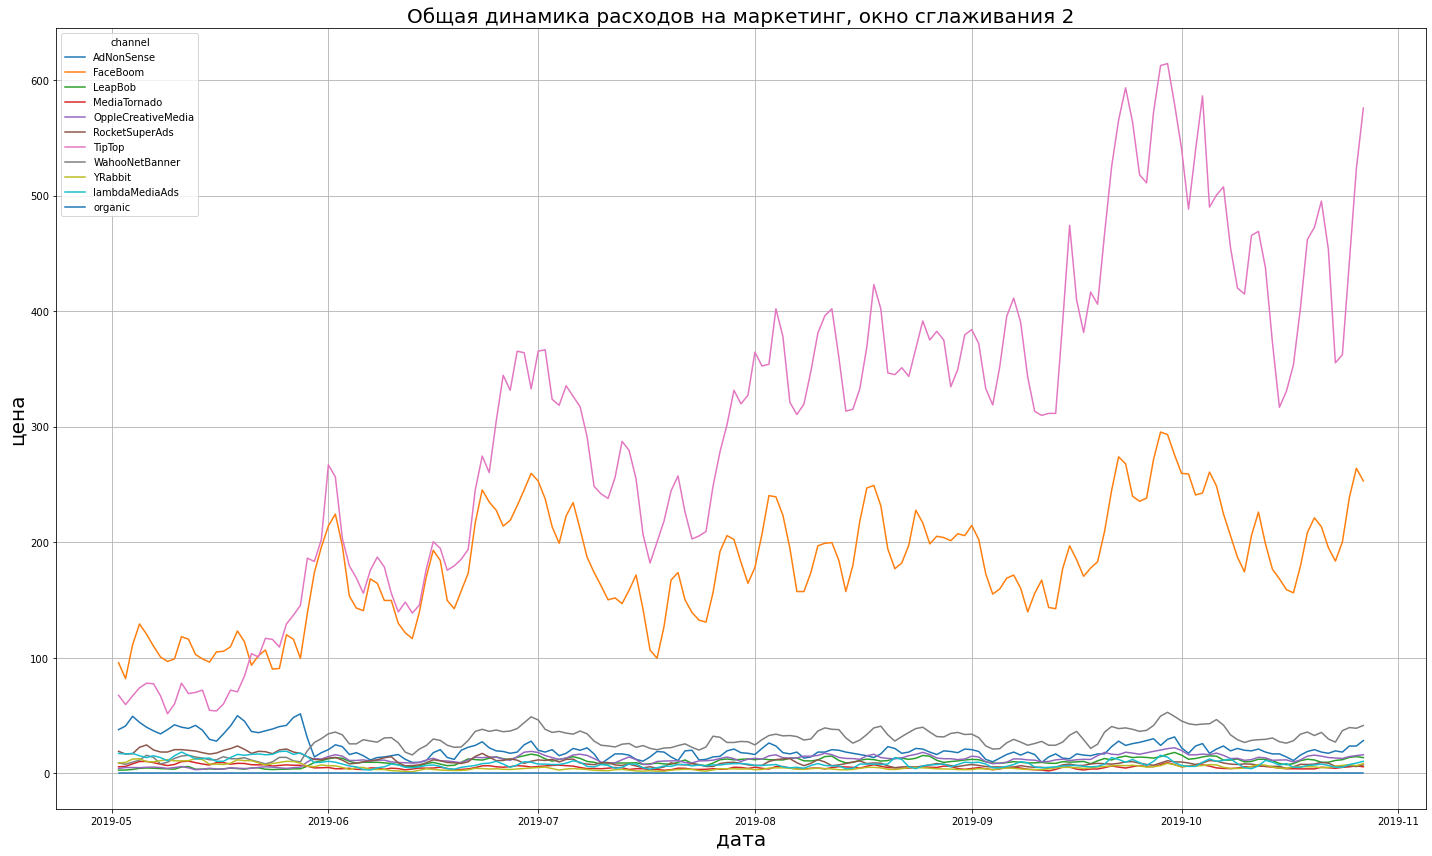

In [35]:
filter_data(filtered_data, 2).plot(figsize=(20, 12), grid=True)
plt.title('Общая динамика расходов на маркетинг, окно сглаживания 2', fontsize=20)
plt.xlabel('дата', fontsize=20)
plt.ylabel('цена', fontsize=20)
plt.tight_layout()
plt.show() 


На графике наблюдаются 3 пиковых значения. Первый локальный максимум затрат  приходится на июнь, следующий на июль. Наибольший пик в октябре. По графику также заметно выделяются основные лидеры - TipTop и FaceBoom. Также выделяются WahooNetBanner и AdNonSense, остальные каналы привлечения не имеют большого различия в затратах по сравнению с лидерами. 
Также посчитаем общую сумму расходов на маркетинг:

In [36]:
print('Общая сумма расходов на маркетинг составляет около', round(profiles['acquisition_cost'].sum()))

Общая сумма расходов на маркетинг составляет около 105497


### Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Для этого рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. 

CAC, или Customer Acquisition Cost, — стоимость привлечения одного клиента. Сумма денег, в которую компании обходится каждый новый клиент. В сущности, CAC — это инвестиции в маркетинг. Для его расчета были убраны органические пользователи, так как для них затраты на инвестиции равны нулю. 

In [37]:
# средний CAC без учета органических пользователей
profiles.query('channel != "organic"')['acquisition_cost'].mean()

1.127481323942928

In [38]:
# средний CAC по каналам привлечения
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending = False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


По табицам мы видим, что среднее значение CAC для всех каналов приблизительно равно 1.13. Всего один канал привлечения - TipTop, превышает данное значение, можно сделать вывод что оно  завышено, наибольший вклад в среднее вносит CAC канала TipTop	

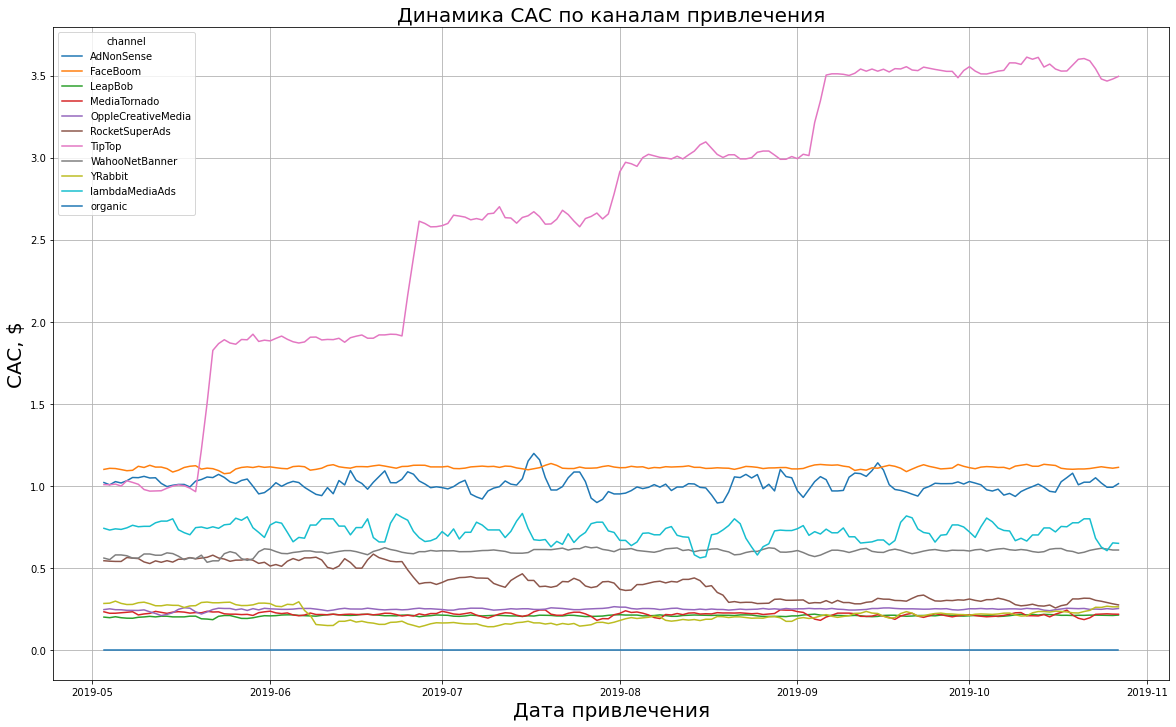

In [39]:
filtered_data = profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
)

filter_data(filtered_data, 3).plot(grid=True, figsize=(20, 12))
plt.ylabel('CAC, $', fontsize=20)
plt.xlabel('Дата привлечения', fontsize=20)
plt.title('Динамика САС по каналам привлечения', fontsize=20)
plt.show()

По графикам видно, что все каналы, кроме TipTop инвестировали в маркетинг относительно равномерно на протяжении времени. Канал TipTop скачкообразно поднимал количество инвестиций каждый месяц. Также заметен ступенчатый спад инвестиций для канала RocketSuperAds. Поскольку канал organic не имеет ценности для анализа маркетинга, продолжим работу с данными без этого канала привлечения. 

### Выводы
1. Мы видим, что самые большие расходны на маркетинг у канала привлечения TipTop. При этом по отношению платящих пользователей к неплатящим данный канал только на 4 месте. У самого популярного канала FaceBoom расходы на маркетинг на втором месте, при этом они значительно ниже расходов у TipTop. Меньше всего вкладывался в маркетинг канал YRabbit. Посмотрим на динамику расходов на маркетинг.
2. На графике динамики расходов на маркетинг наблюдаются 3 пиковых значения. Первый локальный максимум затрат приходится на июнь, следующий на июль. Наибольший пик в октябре. По графику также заметно выделяются основные лидеры - TipTop и FaceBoom. Также выделяются WahooNetBanner и AdNonSense, остальные каналы привлечения не имеют большого различия в затратах по сравнению с лидерами.
3. По табицам мы видим, что среднее значение CAC для всех каналов приблизительно равно 1.13. Всего один канал привлечения - TipTop, превышает данное значение, можно сделать вывод что оно завышено, наибольший вклад в среднее вносит CAC канала TipTop
4. Все каналы, кроме TipTop инвестировали в маркетинг относительно равномерно на протяжении времени. Канал TipTop скачкообразно поднимал количество инвестиций каждый месяц. Также заметен ступенчатый спад инвестиций для канала RocketSuperAds

##  Оценка окупаемости рекламы для привлечения пользователей

данные 1-го ноября 2019 года, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [40]:
# уберем канал привлечения поьзователей, отвечающий за тех, кто пришел сам по себе (не влияющий на маркетинг)
profiles = profiles.query('channel != "organic"')

На календаре 1-e ноября 2019 года, и по бизнес плану пользователи должны окупаться не позднее чем через две недели после привлечения. Зададим момент анализа равным 1-му ноября 2019 года и горизонт анализа в 14 дней. 

In [41]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

### Проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Для начала посмотрим на общую окупаемость рекламы с помощью рассчета и визуализации показателей LTV и ROI с помощью функций get_ltv() и plot_ltv_roi().

In [42]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)


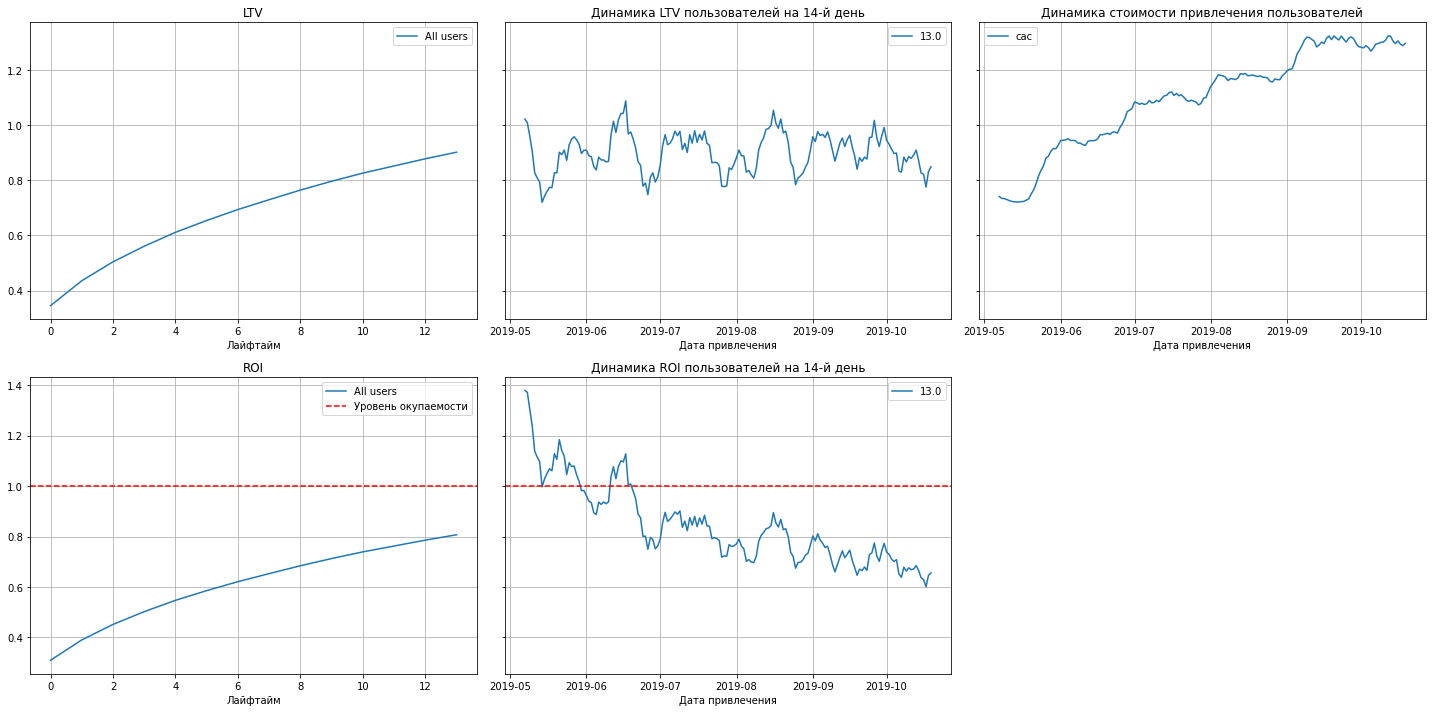

In [43]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам видно, что:
1. ROI в конце недели ниже уровня оккупаемости на 20%, в общем реклама не окупается. Судя по динамике ROI для пользователей, привлеченных до 2019-06, ROI был выше уровня окупаемости 
2. CAC увеличивается ступенчато (похоже на влияние CAC компании TipTop)
3. Показатель LTV достаточно стабилен, имеет некоторые минимумы и максимумы, но тренда на уменьшение нет 

Рассмотрим окупаемость рекламы по признакам

###  Проанализием окупаемость рекламы с разбивкой по устройствам.

In [44]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

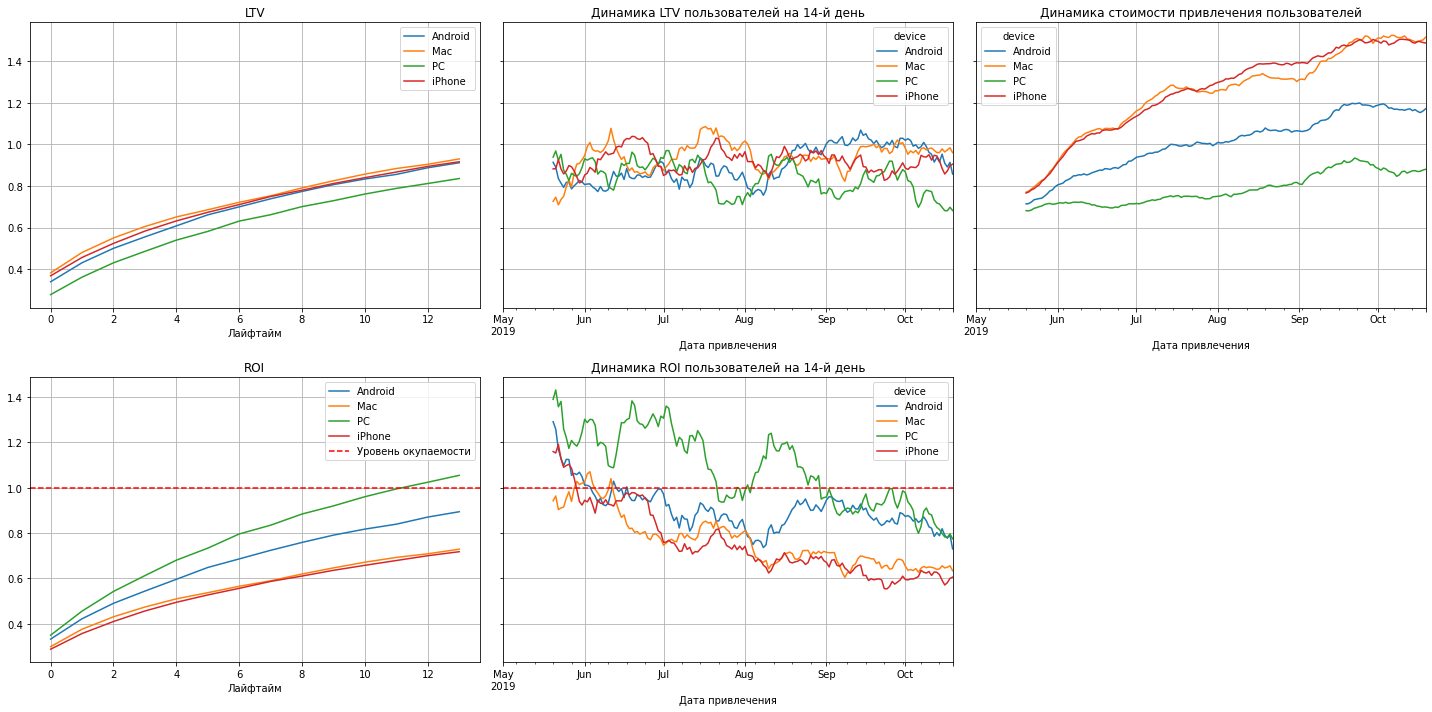

In [45]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20
) 

По графикам видно, что к 14 дню окупаются только пользователи PC, окупаемость пользователей android лучше чем пользователей Mac и iPhone. Стоимость привлечения пользователей растет для каждого типа устройства, при этом самые дорогие пользователи - пользователи Mac и iPhone. Посмотрим на конверсию с разбивкой по устройствам

In [46]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

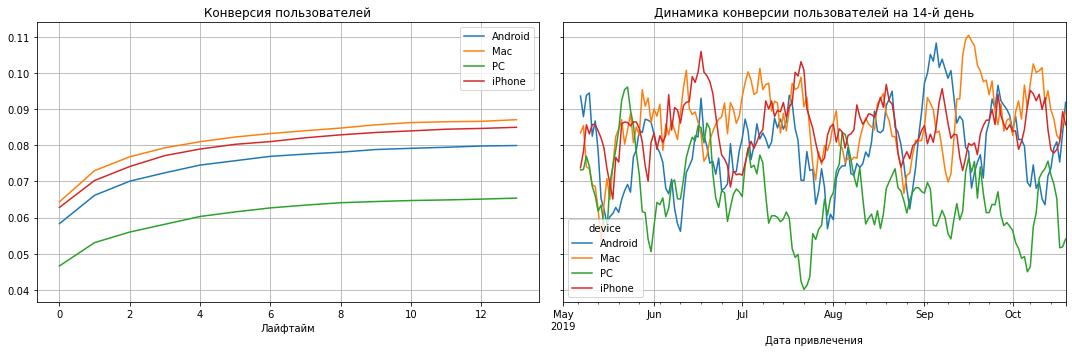

In [47]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Самой высокой конверсией обладают пользователи Mac, самой низкой пользователи PC. Рассмотрим удержание

In [48]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

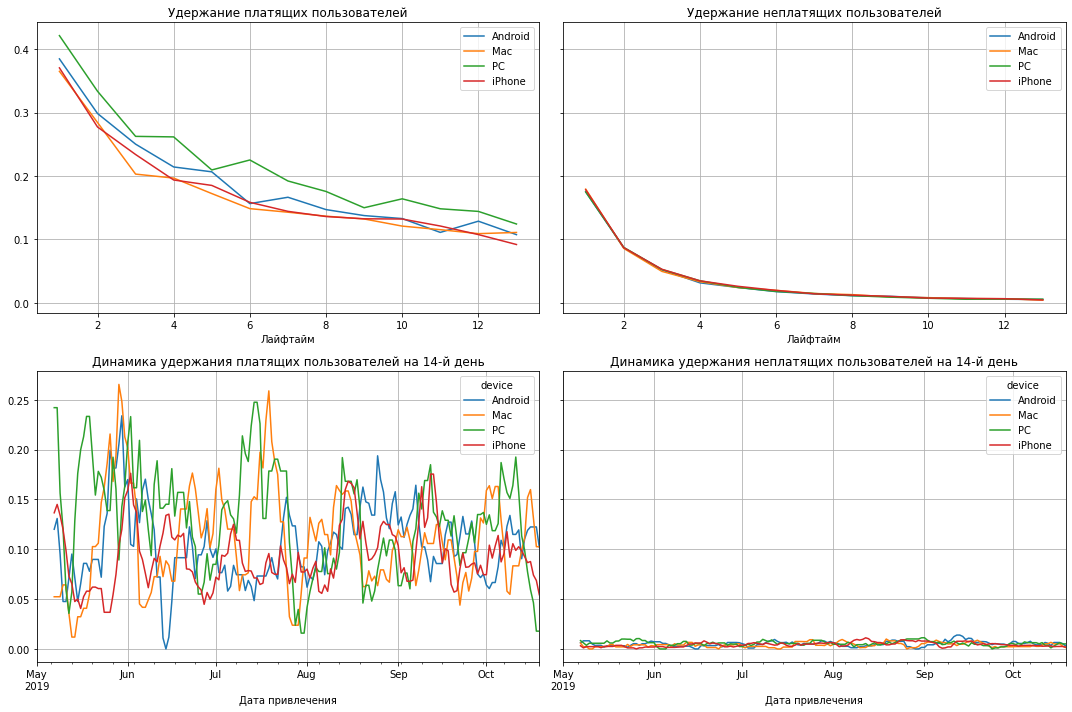

In [49]:
plot_retention(retention_grouped, retention_history, horizon_days) 

Наибольшее удержание у пользователей PC, наименьшее у пользователей Mac. Особых проблем не замечено, однако пользователи PC являются потенциальными пользователями, на которых можно опираться при продумывании следующей маркетинговой стратегии для данного приложения. 

### Проанализируем окупаемость рекламы с разбивкой по странам

In [50]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

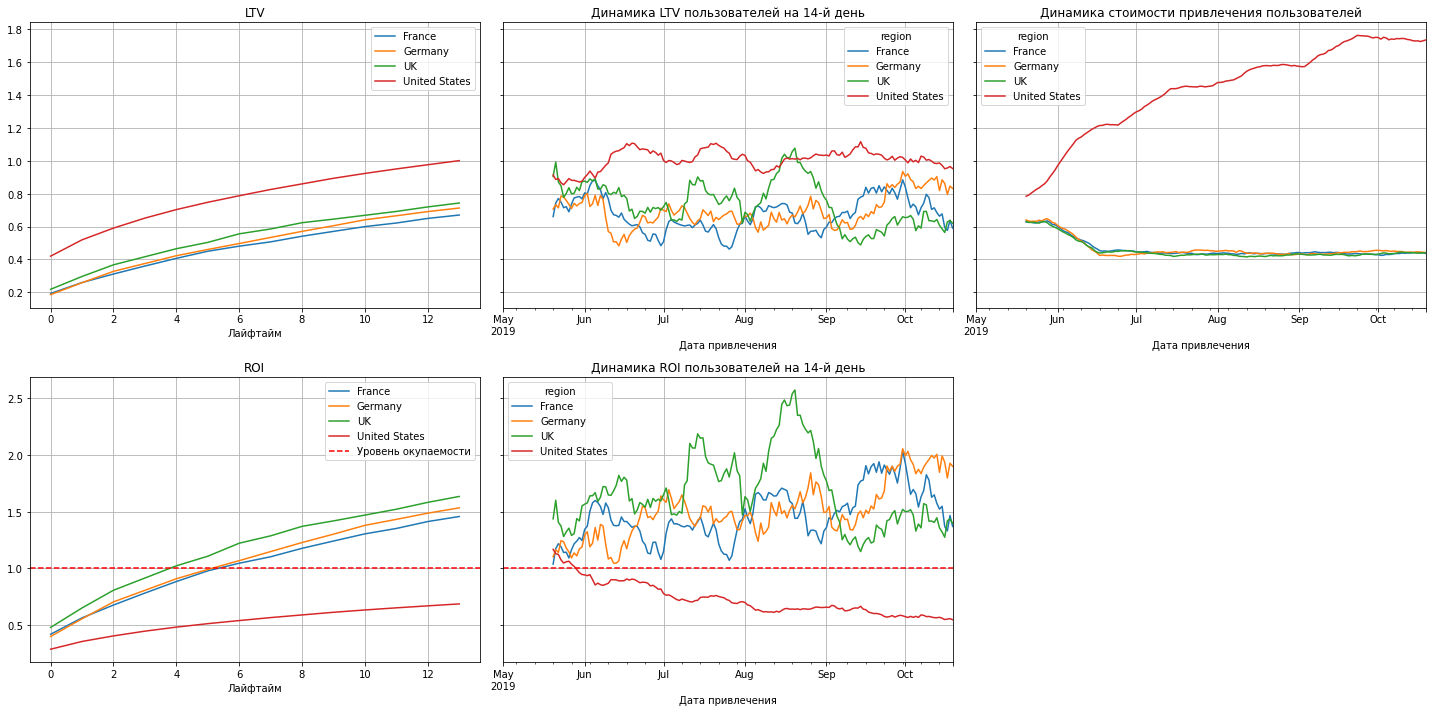

In [51]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20
) 

По графикам видно, что пользователи из США стабильно не окупаются, по сравнению с пользователями из других стран. При этом они имеют наибольшую стоимость привлечения и их сильно больше, по сравнению с пользователями других стран. Пользователи из Великобритании начинают окупаться на 4 день, пользователи из Германии и франции начинают окупаться к 6 дню. При этом стоимость привлечения европейский пользователей падает, а стоимость привлечения пользователей США очень сильно растет. Пользователи США самые ценны (наибольшее LTV).
Посмотрим в чем может быть причина, для этого посчитаем и визуализируем конверсию.

In [52]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

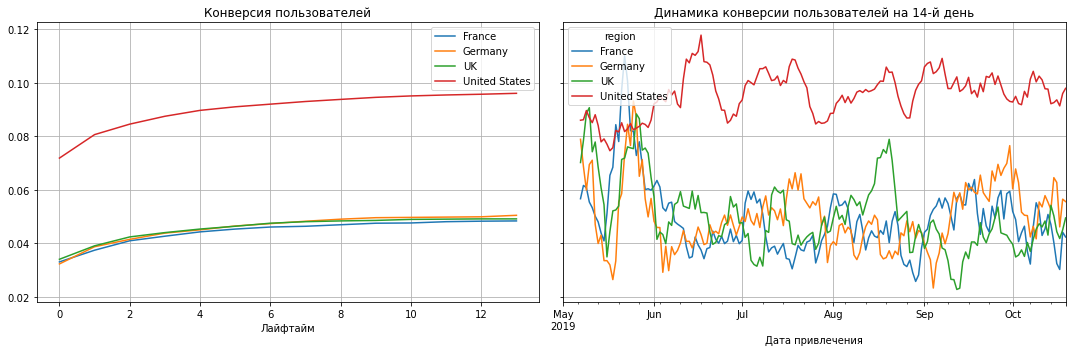

In [53]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Из графика конверсии видно, что пользователи США конвертируются лучше всех, остается рассмотреть удержание данных пользователей. Над конверсией европейский пользователей следует поработать. 

In [54]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

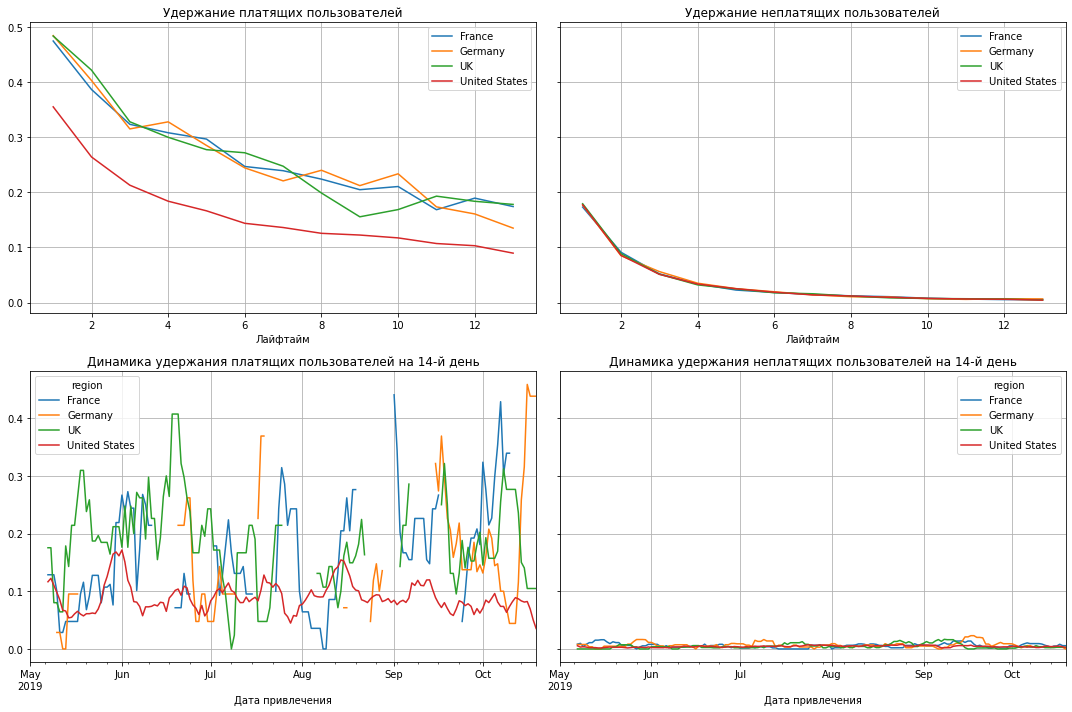

In [55]:
plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из США стабильно плохо удерживаются. Это видно как и из общей кривой удержания платящих полльзователей, так и из динамики удержания платящих пользователей на 14 день.
Причина может быть в технической проблеме. 
Динамика удержанния европейских пользователей имеет разрывы в графике, это может быть связано с маленькими выборками. В целом лучше всего удерживаются пользователи из Великобритании. 

### Проанализием окупаемость рекламы с разбивкой по рекламным каналам. 

In [56]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

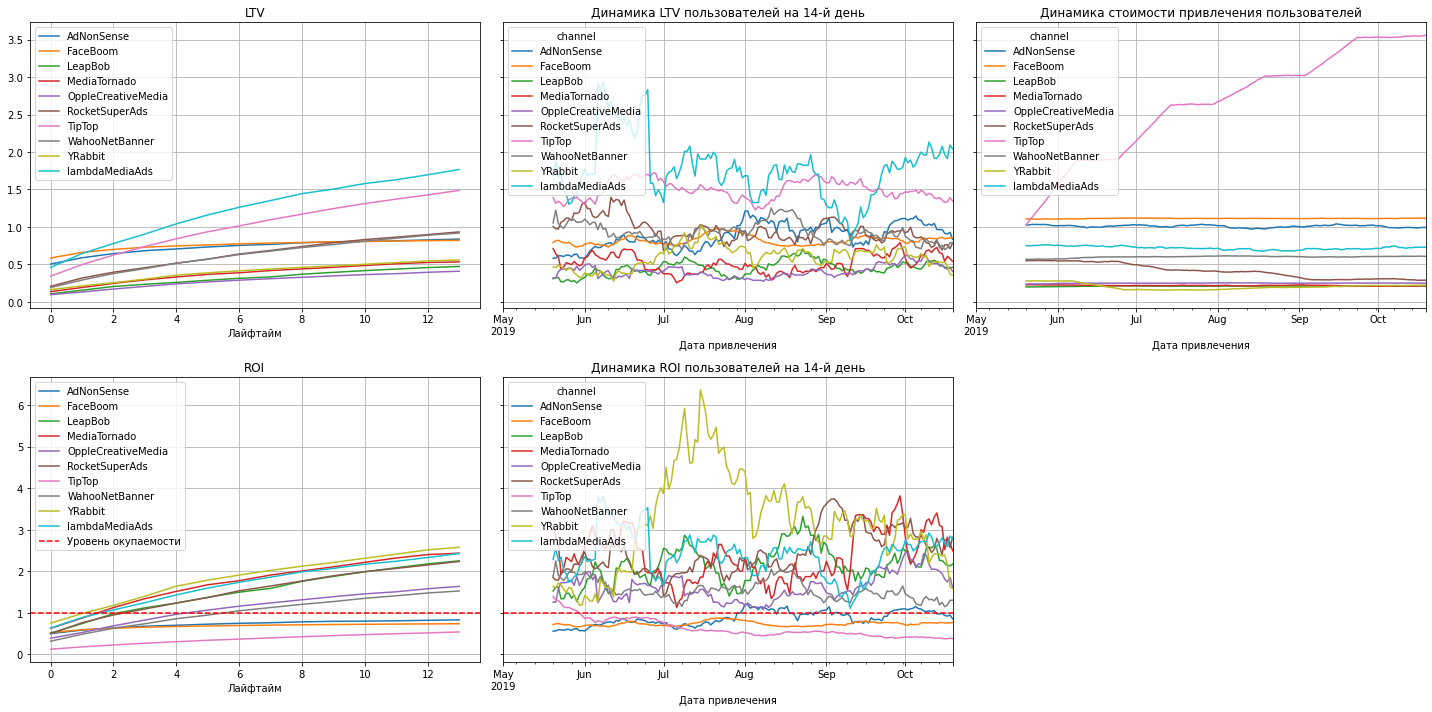

In [57]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20
) 

Видно, что реклама начинает окупаться для всех источников, кроме TipTop, FaceBoom и AdNonSense. Лучше всего окупается YRabbit.  При этом TipTop больше всего вкладывает в рекламу. Определенно стоит понять что там случилось. Стоимость привлечения стабильна для всех каналов кроме  TipTop (ступенчатое увеличение) и RocketSuperAds (уменьшение стоимости привлечения). 
Канал привлечения lambdaMediaAds имеет сильный всплеск LTV пользователей с июня по июль, и падение с сентября по октябрь.

 Посмотрим в чем может быть причина, для этого посчитаем и визуализируем конверсию

In [58]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

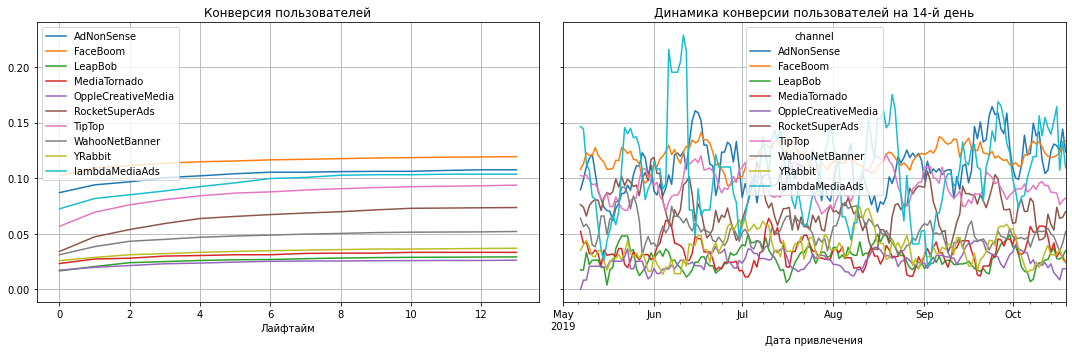

In [59]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Мы видим, что пользователи всех каналов стабильно конвертируются. Проверим как выглядит удержание по каналам

In [60]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

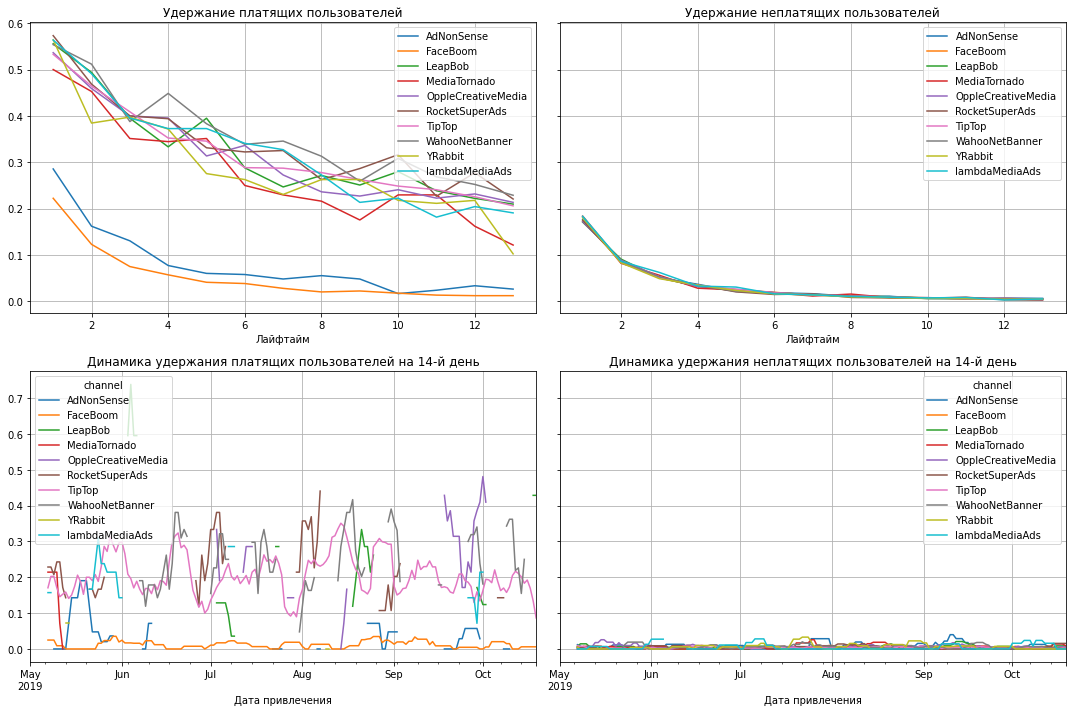

In [61]:
plot_retention(retention_grouped, retention_history, horizon_days) 

Мы видим, что пользователи каналов AdNonSense и FaceBoom стабильно плохо удерживаются. При этом канал FaceBoom находится на втором месте по привлечению инвестиций в маркетинг и на первом месте по количеству платящих пользователей. Можно также предположить наличие технической ошибки или же рекламную стратегию, которая не описывает действительность приложения, и пользователи не возвращаются. 

Общие выводы по полученным графикам метрик:
1. В общем ROI в конце недели ниже уровня оккупаемости на 20%, реклама не окупается. Судя по динамике ROI для пользователей, привлеченных до 2019-06, ROI был выше уровня окупаемости. CAC увеличивается ступенчато (похоже на влияние CAC компании TipTop). Показатель LTV достаточно стабилен, имеет некоторые минимумы и максимумы, но тренда на уменьшение нет
2. При анализе окупаемости в зависимости от используемого устройства видно, что к 14 дню окупаются только пользователи PC, окупаемость пользователей android лучше чем пользователей Mac и iPhone. Стоимость привлечения пользователей растет для каждого типа устройства, при этом самые дорогие пользователи - пользователи Mac и iPhone. Самой высокой конверсией обладают пользователи Mac, самой низкой пользователи PC. Наибольшее удержание у пользователей PC, наименьшее у пользователей Mac. Особых проблем не замечено, однако пользователи PC являются потенциальными пользователями, на которых можно опираться при продумывании следующей маркетинговой стратегии для данного приложения. 
3. По графикам окупаемости в зависимости от страны видно, что пользователи из США стабильно не окупаются, по сравнению с пользователями из других стран. При этом они имеют наибольшую стоимость привлечения и их сильно больше, по сравнению с пользователями других стран. Пользователи из Великобритании начинают окупаться на 4 день, пользователи из Германии и франции начинают окупаться к 6 дню. При этом стоимость привлечения европейский пользователей падает, а стоимость привлечения пользователей США очень сильно растет. Пользователи США самые ценны (наибольшее LTV). Из графика конверсии видно, что пользователи США конвертируются лучше всех, остается рассмотреть удержание данных пользователей. Над конверсией европейский пользователей следует поработать. Динамика удержанния европейских пользователей имеет разрывы в графике, это может быть связано с маленькими выборками. В целом лучше всего удерживаются пользователи из Великобритании.  
4. ИЗ графиков окупаемости в зависимости от канала привлечения видно, что реклама начинает окупаться для всех источников, кроме TipTop, FaceBoom и AdNonSense. Лучше всего окупается YRabbit. При этом TipTop больше всего вкладывает в рекламу. Определенно стоит понять что там случилось. Стоимость привлечения стабильна для всех каналов кроме TipTop (ступенчатое увеличение) и RocketSuperAds (уменьшение стоимости привлечения). Канал привлечения lambdaMediaAds имеет сильный всплеск LTV пользователей с июня по июль, и падение с сентября по октябрь. Пользователи всех каналов стабильно конвертируются, однако пользователи каналов AdNonSense и FaceBoom стабильно плохо удерживаются. При этом канал FaceBoom находится на втором месте по привлечению инвестиций в маркетинг и на первом месте по количеству платящих пользователей. Можно также предположить наличие технической ошибки или же рекламную стратегию, которая не описывает действительность приложения, и пользователи не возвращаются.

## Выводы

1. На первом этапе были загружены данные, данные были проанализированы, название столбцов приведены к формату snake_case, столбцы с датой и временем приведены к формату datetime
2. Создан раздел с необходимыми для анализа функциями
3. Далее были составлены пользовательские профили. По ним было выяснено, что:
- - Пользователи приходят в приложение из 4 стран: США, Великобритания, Франция и Германия. Наибольшее количество платящих пользователей приходит из США (7%), из трех других стран приходит практически одинаковое количество, сильно меньшее, чем количество платящих пользователей из США
- - Пользователи пользуются 4 видами устройств: MC, iPhone, PC, Android. Наибольшее отношение платящих пользователей ко всем у владельцев устройств Mac (около 6.5 %). Наименьшее у пользователей PC - около 5%. При этом наибольшее количество платящих пользователей среди владельцев IPhone, наименьшее среди владельцев PC.
- - Существует 9 каналов привлечения (помимо бесплатного organic). Наибольшее соотношение платящих пользователей к неплатящим у канала привлечения FaceBoom (больше 12%), затем идет канал AdNonSense (11%). Наименьшее соотношение платящих пользователей к неплатящим у канала OppleCreativeMedia (около 2 процентов)
4. Самые большие расходы на маркетинг у канала привлечения TipTop. При этом по отношению платящих пользователей к неплатящим данный канал только на 4 месте. У самого популярного канала FaceBoom расходы на маркетинг на втором месте, при этом они значительно ниже расходов у TipTop. Меньше всего вкладывался в маркетинг канал YRabbit. На графике расходов на маркетинг в динамике наблюдаются 3 пиковых значения. Первый локальный максимум затрат  приходится на июнь, следующий на июль. Наибольший пик в октябре. По графику также заметно выделяются основные лидеры - TipTop и FaceBoom. Также выделяются WahooNetBanner и AdNonSense, остальные каналы привлечения не имеют большого различия в затратах по сравнению с лидерами.
5. По табицам мы видим, что среднее значение CAC для всех каналов приблизительно равно 1.13. Всего один канал привлечения - TipTop, превышает данное значение, можно сделать вывод что оно завышено, наибольший вклад в среднее вносит CAC канала TipTop равный 2.8. Все каналы, кроме TipTop инвестировали в маркетинг относительно равномерно на протяжении времени. Канал TipTop скачкообразно поднимал количество инвестиций каждый месяц. Также заметен ступенчатый спад инвестиций для канала RocketSuperAds. Поскольку канал organic не имеет ценности для анализа маркетинга, продолжим работу с данными без этого канала привлечения.
6. Сначала мы проанализровали общую окупаемость:
- - ROI в конце недели ниже уровня оккупаемости на 20%, в общем реклама не окупается. Судя по динамике ROI для пользователей, привлеченных до 2019-06, ROI был выше уровня окупаемости. CAC увеличивается ступенчато (похоже на влияние CAC компании TipTop). Показатель LTV достаточно стабилен, имеет некоторые минимумы и максимумы, но тренда на уменьшение нет
7. Затем мы проанализировали окупаемость рекламы с разбивкой по устройствам. 
- -  К 14 дню окупаются только пользователи PC, окупаемость пользователей Android лучше чем пользователей Mac и iPhone. Стоимость привлечения пользователей растет для каждого типа устройства, при этом самые дорогие пользователи - пользователи Mac и iPhone. Посмотрим на конверсию с разбивкой по устройствам (анализ графиков ROI, LTV, их динамики).
- - Самой высокой конверсией обладают пользователи Mac, самой низкой пользователи PC. В целом прооблем с конверсией с разбивкой по устройствам не замечено
- - Наибольшее удержание у пользователей PC, наименьшее у пользователей Mac. Особых проблем не замечено, однако пользователи PC являются потенциальными пользователями, на которых можно опираться при продумывании следующей маркетинговой стратегии для данного приложения
8. Затем мы проанализировали окупаемость рекламы с разбивкой по странам. 
- - По графикам ROI, LTV, их динамики видно, что польльзователи из США стабильно не окупаются, по сравнению с пользователями из других стран. При этом они имеют наибольшую стоимость привлечения и их сильно больше, по сравнению с пользователями других стран. Пользователи из Великобритании начинают окупаться на 4 день, пользователи из Германии и франции начинают окупаться к 6 дню. При этом стоимость привлечения европейский пользователей падает, а стоимость привлечения пользователей США очень сильно растет. Пользователи США самые ценны (наибольшее LTV).
- - Пользователи США конвертируются лучше пользователей из других стран. Над конверсией европейский пользователей следует поработать.
- - Пользователи из США стабильно плохо удерживаются. Это видно как и из общей кривой удержания платящих полльзователей, так и из динамики удержания платящих пользователей на 14 день. Причина может быть в технической проблеме.  Динамика удержанния европейских пользователей имеет разрывы в графике, это может быть связано с маленькими выборками. В целом лучше всего удерживаются пользователи из Великобритании.  
9. Затем мы проанализировали окупаемость рекламы с разбивкой по каналам привлечения. 
- - Реклама начинает окупаться для всех источников, кроме TipTop, FaceBoom и AdNonSense. Лучше всего окупается YRabbit. При этом TipTop больше всего вкладывает в рекламу. Определенно стоит понять что там случилось. Стоимость привлечения стабильна для всех каналов кроме TipTop (ступенчатое увеличение) и RocketSuperAds (уменьшение стоимости привлечения). Канал привлечения lambdaMediaAds имеет сильный всплеск LTV пользователей с июня по июль, и падение с сентября по октябрь.
- - Пользователи всех каналов стабильно конвертируются
- - Пользователи каналов AdNonSense и FaceBoom стабильно плохо удерживаются. При этом канал FaceBoom находится на втором месте по привлечению инвестиций в маркетинг и на первом месте по количеству платящих пользователей. Можно также предположить наличие технической ошибки или же рекламную стратегию, которая не описывает действительность приложения, и пользователи не возвращаются.

## Рекомендации

1. Относительно устройств, с удержанием пользователей не было замечено. Лучше всего удерживаются пользователи PC, однако пользователи PC плохо конвертируются по сравнению с другими устройствами.  Улучшение конверсии для пользователей PC может помочь  следующей маркетинговой кампании стать прибыльнее. 
2. Пользователи США являются основной нишей для данного приложения, имеют хорошую конверсию, однако очень плохо удерживаются. Это может быть связано с рядом факторов. Для начала надо проверить существуют ли логи с сообщениями о событиях на предмет технической ошибки. Возможны какие-то проблемы с переходом в приложение для этих пользователей. 
3. Среди европейских пользователей быстрее всего окупаются пользователи из Великобритании. При этом стоимость привлечения пользователей из Европы сильно меньше, чем пользователей из США, однако пользователи из Европы хуже конвертируются. Поскольку затраты на рекламу меньше, то можно подумать над увеличением конверсии и инвестициях в маркетинг для европейской ниши. 
4. Наибольшие затраты на рекламу у каналов привлечения  TipTop и FaceBoom, они прямо таки огромные по сравнению с затратами других источников. При этом TipTop и FaceBoom не окупаюся, также у источника FaceBoom проблемы с удержанием пользователей. Для источников TipTop и FaceBoom можно сократить количество инвестиций и для начала разобраться с удержанием пользователей для FaceBoom и в причинах такого низкого ROI для  TipTop. 
